# Modelos de Regresión en Python

Este cuaderno contiene el código para la implementación de modelos de regresión en Python.

In [294]:
# Cargar modulos para ciencia de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
pd.set_option('display.max_columns', None)

# Cargar modulos para modelo de regresión
import statsmodels.api as sm

In [295]:
# Para conectarse con google drive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [296]:
# Configurar directorio de trabajo
os.chdir('/gdrive/MyDrive/Colab Notebooks/Analitica de Datos UJaveriana')

# Verificar los archivos de las carpetas
!ls

'1. Analisis Exploratorio.ipynb'   bank_marketing.csv   publicidad.csv
'2. Modelo de Regresion.ipynb'	   predicciones.xlsx


## Caso 1. Gastos de Publicidad

### Enunciado de caso de regresión

Una empresa de marketing está interesada en desarrollar un modelo de regresión lineal para predecir las ventas de un producto en función del presupuesto de publicidad en televisión, radio y periódico. La empresa tiene datos de ventas para 4 regiones geográficas, por lo que el modelo también incluirá una variable de zona.

### Objetivo

Desarrollar un modelo de regresión lineal que permita a la empresa predecir las ventas de un producto en función del presupuesto de publicidad y la zona geográfica.

### Variables

- **tv:** Presupuesto de publicidad en televisión (en miles de dólares)
- **radio:** Presupuesto de publicidad en radio (en miles de dólares)
- **periodico:** Presupuesto de publicidad en periódico (en miles de dólares)
- **zona:** Región geográfica (occidente o oriente)
- **ventas:** Ventas del producto (en miles de unidades)

### Análisis

El análisis de los datos se realizará utilizando los siguientes métodos:

1. **Análisis exploratorio de datos:** Se utilizarán gráficos y tablas para explorar la relación entre las variables.
2. **Modelado de regresión lineal:** Se utilizará un modelo de regresión lineal para predecir las ventas en función de las variables de entrada.
3. **Evaluación del modelo:** Se utilizarán los indicadores $R^2$ y $R^2_{ajustado}$ para evaluar la precisión del modelo.



In [297]:
# Cargar datos
datos = pd.read_csv('publicidad.csv')
datos.head()

,tv,radio,periodico,zona,ventas
0,230.1,37.8,69.2,occidente,22.1
1,44.5,39.3,45.1,oriente,10.4
2,17.2,45.9,69.3,occidente,9.3
3,151.5,41.3,58.5,occidente,18.5
4,180.8,10.8,58.4,oriente,12.9


### 1. Análisis Exploratorio de Datos

In [298]:
# Extraiga la información general de los datos


#### Análisis Univariado

In [299]:
# Resumen estadístico para variables numericas


In [300]:
# Distribución de las ventas.
# Para la distribución utilice la siguiente función: sns.histplot(data=DataFrame, x='columna')
# Adapte la función y escriba el código:


In [301]:
# Dado que las columnas tv, radio y periodico estan la misma unidad (gastos en $) comparelas e identifique datos atípicos
# Genere un gráfico de caja para comparar los tres gastos, utilice el siguiente código: datos[['radio','tv','periodico']].boxplot()


¿A todos lo medios se les destina en promedio la misma cantidad de dinero?


¿A qué medio parace destinar un mayor gasto medio? ¿Cuál puede ser la razón?


¿Hay datos atípicos? ¿Cuál puede ser la razón de estos datos atípicos?


In [302]:
# Tabla de frecuencia para zona.
# Adapte el siguiente código: DataFrame['columna'].value_counts()


In [303]:
# Gráfico de Barra
# Adapte el siguiente código: DataFrame['zona'].value_counts().plot.bar()


#### Análisis Bivariado

In [304]:
# Gráfico de dispersión gasto tv vs ventas
# Adapte el siguiente código: sns.scatterplot(data=DataFrame, x='columna_x', y='columna_y')


In [305]:
# Gráfico de dispersión gasto radio vs ventas


In [306]:
# Gráfico de dispersión gasto periodico vs ventas


In [307]:
# Calcule la correlación entre variables numéricas
# Adapte el siguiente código: DataFrame[['columna_numerica_1','columna_numerica_2','columna_numerica_3','columna_numerica_k']].corr()


In [308]:
# Ahora gráfique las matriz de correlación
# utilice el siguiente codigo: sns.heatmap(datos.corr(), annot=True)


In [309]:
# Gráfico de caja para comparar las ventas entre zonas


¿Qué variables tienen una mayor relación con las ventas?

Escriba aqui su conclusión:...

### 2. Modelo de Regresión Lineal

#### Configuración del Modelo y Ajuste

In [310]:
# En primer lugar se dividen los datos en variables independientes y variable dependiente.

# Variable dependiente
Y = datos['ventas']

# Variables numéricas independientes
X = datos[['tv','radio','periodico']]

In [311]:
# Agregar la constante al modelo
X = sm.add_constant(X)

# Crear el modelo y ajustarlo
modelo_regresion = sm.OLS(Y, X).fit()

# Generar un resumen del modelo
print(modelo_regresion.summary())

                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 01 Oct 2023   Prob (F-statistic):           1.58e-96
Time:                        20:36:00   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

#### Análisis de predicciones

In [312]:
# Se crea una tabla para guardar las ventas reales y las predicciones
prediccion = pd.DataFrame()

# Se crea una nueva columna para guardar las ventas
prediccion['ventas_reales'] = Y

# Ahora se crea una nueva columna para guardar las predicciones
prediccion['ventas_modelo_lineal'] = modelo_regresion.predict()
prediccion

,ventas_reales,ventas_modelo_lineal
0,22.1,20.523974
1,10.4,12.337855
2,9.3,12.307671
3,18.5,17.597830
4,12.9,13.188672
...,...,...
195,7.6,5.370342
196,9.7,8.165312
197,12.8,12.785921
198,25.5,23.767321


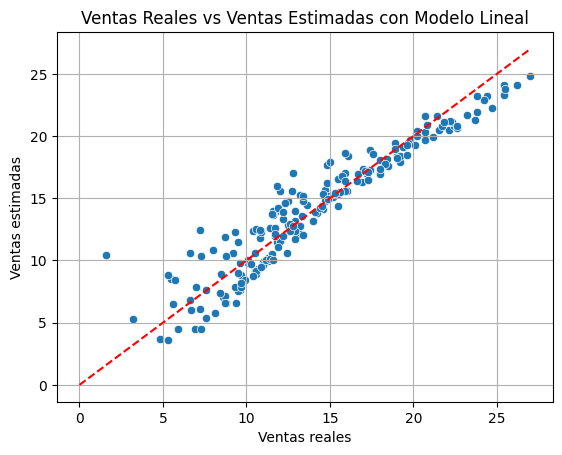

In [313]:
# Crea la gráfica de dispersión
sns.scatterplot(data=prediccion, x='ventas_reales', y='ventas_modelo_lineal')

# Crear la linea de predicción perfectas
plt.plot([0, prediccion["ventas_reales"].max()], [0, prediccion["ventas_reales"].max()], color="red", linestyle="dashed")
plt.title('Ventas Reales vs Ventas Estimadas con Modelo Lineal')
plt.xlabel('Ventas reales')
plt.ylabel('Ventas estimadas')
plt.grid(True)
plt.show()

In [314]:
# Calcular el MSE
mse_mod_linal = mean_squared_error(y_true=prediccion['ventas_reales'], y_pred=prediccion['ventas_modelo_lineal'])
mse_mod_linal

2.784126314510936

In [315]:
# Calcular el RMSE
rmse_mod_linal = np.sqrt(mse_mod_linal)
rmse_mod_linal

1.6685701407225697

**En promedio las predicciones se desvian en 1.67 (1670 unidades)**

In [316]:
# Calcular el MAPE
mape_mod_lineal = mean_absolute_percentage_error(y_true=prediccion['ventas_reales'], y_pred=prediccion['ventas_modelo_lineal'])
mape_mod_lineal

0.1387784709045716

**En promedio las predicciones se desvian un 13.88% con respecto al valor real.**

### Análisis de residuales

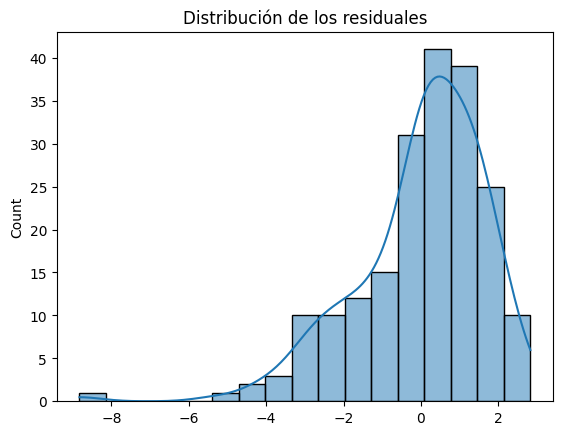

In [317]:
# Normalidad
sns.histplot(x=modelo_regresion.resid, kde=True)
plt.title("Distribución de los residuales")
plt.show()

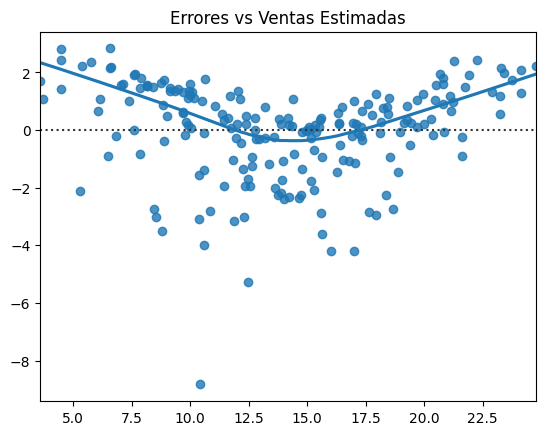

In [318]:
# Varianza constante (Homocedasticidad)
sns.residplot(x=modelo_regresion.predict(), y=modelo_regresion.resid, lowess=True)
plt.title("Errores vs Ventas Estimadas")
plt.show()

### Taller Grupal: Modelo de Regresión No Lineal

#### Interacción entre el gasto de tv y radio



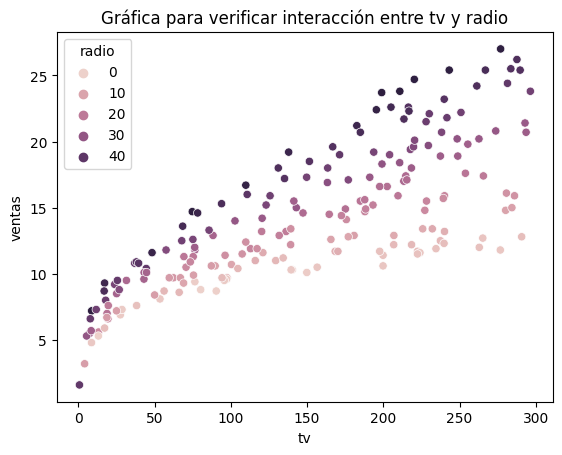

In [319]:
# Gráfica de interacción tv y radio
sns.scatterplot(data=datos, x='tv', y='ventas', hue='radio')
plt.title("Gráfica para verificar interacción entre tv y radio")
plt.show()

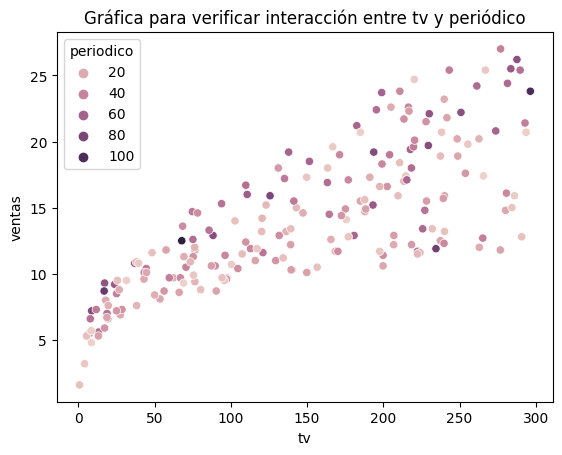

In [320]:
# Gráfica de interacción tv y radio
sns.scatterplot(data=datos, x='tv', y='ventas', hue='periodico')
plt.title("Gráfica para verificar interacción entre tv y periódico")
plt.show()

#### Comportamiento No Lineal de la relación entre las ventas y tv

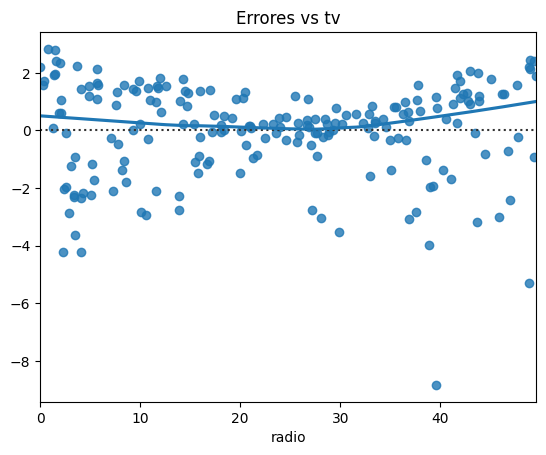

In [321]:
# Varianza constante (Homocedasticidad)
sns.residplot(x=datos['radio'], y=modelo_regresion.resid, lowess=True)
plt.title("Errores vs tv")
plt.show()

In [322]:
# Agregar la variable de interacción de tv y
datos['int-tv-radio'] = datos['tv']*datos['radio']
datos['tv2'] = datos['tv']**2

In [323]:
# Seleccione la variable dependiente

# Seleccione las variables independientes: tv, radio, periodico, zona, int-tv-radio y tv2


In [324]:
# Agregar la constante al modelo

# Crear el modelo y ajustarlo

# Generar un resumen del modelo. LLamelo modelo_regresion_no_lineal


In [325]:
# Ahora se crea una nueva columna para guardar las predicciones del modelo no lineal
# Llame a la nueva columna: ventas_modelo_no_lineal


In [326]:
# Crea la gráfica de dispersión

# Crear la linea de predicción perfectas


In [327]:
# Calcular el MSE


In [328]:
# Calcular el RMSE


In [329]:
# Calcular el MAPE


In [330]:
# Hisrograma de los residuales


In [331]:
# Gráfica de residuales vs valores ajustados
